In [21]:
import utils.helper_functions_v2 as hf
import warnings
warnings.filterwarnings('ignore')
print("Setup Complete")

Setup Complete


In [22]:
run_random_search = False
league = 'premier-league'
seasons = '2017-2023'
season_test = 2018

In [23]:
# Read the data
X_full, y, X_test_full, y_test, odds_test = hf.get_league_data(league, seasons, season_test)
display(X_full)

,game_date,season,home_team,away_team,home_pts_pct,home_win_pct,home_draw_pct,home_loss_pct,home_home_win_pct,home_home_draw_pct,...,away_away_win_pct,away_away_draw_pct,away_away_loss_pct,away_win_pct_last_games,away_draw_pct_last_games,away_loss_pct_last_games,away_score_last_games,away_conceded_last_games,away_xg_last_games,away_conceded_xg_last_games
0,2017-11-04,2017,Stoke City,Leicester City,36.666667,30.000000,20.000000,50.000000,40.000000,20.000000,...,20.000000,40.000000,40.000000,40.0,40.0,20.0,1.666667,1.333333,1.58,0.94
1,2017-11-04,2017,Southampton,Burnley,43.333333,30.000000,40.000000,30.000000,33.333333,33.333333,...,40.000000,40.000000,20.000000,40.0,40.0,20.0,0.666667,0.333333,0.60,1.18
2,2017-11-04,2017,Swansea City,Brighton,26.666667,20.000000,20.000000,60.000000,20.000000,0.000000,...,20.000000,20.000000,60.000000,40.0,40.0,20.0,1.000000,0.666667,1.00,1.28
3,2017-11-04,2017,Huddersfield,West Brom,40.000000,30.000000,30.000000,40.000000,40.000000,40.000000,...,20.000000,20.000000,60.000000,0.0,40.0,60.0,2.000000,2.500000,0.98,1.84
4,2017-11-04,2017,Newcastle Utd,Bournemouth,46.666667,40.000000,20.000000,40.000000,60.000000,20.000000,...,20.000000,0.000000,80.000000,20.0,20.0,60.0,0.000000,0.500000,0.70,1.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,2018-05-13,2017,Huddersfield,Arsenal,33.333333,24.324324,27.027027,48.648649,33.333333,27.777778,...,16.666667,22.222222,61.111111,40.0,0.0,60.0,4.500000,0.500000,1.50,1.16
274,2018-05-13,2017,Newcastle Utd,Chelsea,36.936937,29.729730,21.621622,48.648649,38.888889,22.222222,...,55.555556,16.666667,27.777778,80.0,20.0,0.0,1.000000,0.500000,1.30,0.62
275,2018-05-13,2017,Manchester Utd,Watford,70.270270,64.864865,16.216216,18.918919,77.777778,11.111111,...,22.222222,11.111111,66.666667,20.0,20.0,60.0,1.000000,1.000000,1.16,0.84
276,2018-05-13,2017,Southampton,Manchester City,32.432432,18.918919,40.540541,40.540541,22.222222,38.888889,...,83.333333,11.111111,5.555556,80.0,20.0,0.0,2.666667,0.333333,2.18,0.46


In [24]:
# Define categorical and numerical columns
categorical_cols, numerical_cols = hf.set_numerical_categorical_cols(X_full)

# Keep selected columns only
X_train, y_train, X_test = hf.filter_datasets(X_full, y, X_test_full, categorical_cols, numerical_cols)

In [25]:
# hf.plot_feature_corr_chart(X_train, numerical_cols)

,season,home_pts_pct,home_win_pct,home_draw_pct,home_loss_pct,home_home_win_pct,home_home_draw_pct,home_home_loss_pct,home_win_pct_last_games,home_draw_pct_last_games,...,away_away_win_pct,away_away_draw_pct,away_away_loss_pct,away_win_pct_last_games,away_draw_pct_last_games,away_loss_pct_last_games,away_score_last_games,away_conceded_last_games,away_xg_last_games,away_conceded_xg_last_games
0,2017.0,36.666667,30.000000,20.000000,50.000000,40.000000,20.000000,40.000000,40.0,0.0,...,20.000000,40.000000,40.000000,40.0,40.0,20.0,1.666667,1.333333,1.58,0.94
1,2017.0,43.333333,30.000000,40.000000,30.000000,33.333333,33.333333,33.333333,20.0,40.0,...,40.000000,40.000000,20.000000,40.0,40.0,20.0,0.666667,0.333333,0.60,1.18
2,2017.0,26.666667,20.000000,20.000000,60.000000,20.000000,0.000000,80.000000,20.0,0.0,...,20.000000,20.000000,60.000000,40.0,40.0,20.0,1.000000,0.666667,1.00,1.28
3,2017.0,40.000000,30.000000,30.000000,40.000000,40.000000,40.000000,20.000000,20.0,20.0,...,20.000000,20.000000,60.000000,0.0,40.0,60.0,2.000000,2.500000,0.98,1.84
4,2017.0,46.666667,40.000000,20.000000,40.000000,60.000000,20.000000,20.000000,20.0,40.0,...,20.000000,0.000000,80.000000,20.0,20.0,60.0,0.000000,0.500000,0.70,1.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,2017.0,33.333333,24.324324,27.027027,48.648649,33.333333,27.777778,38.888889,20.0,60.0,...,16.666667,22.222222,61.111111,40.0,0.0,60.0,4.500000,0.500000,1.50,1.16
274,2017.0,36.936937,29.729730,21.621622,48.648649,38.888889,22.222222,38.888889,20.0,0.0,...,55.555556,16.666667,27.777778,80.0,20.0,0.0,1.000000,0.500000,1.30,0.62
275,2017.0,70.270270,64.864865,16.216216,18.918919,77.777778,11.111111,11.111111,40.0,20.0,...,22.222222,11.111111,66.666667,20.0,20.0,60.0,1.000000,1.000000,1.16,0.84
276,2017.0,32.432432,18.918919,40.540541,40.540541,22.222222,38.888889,38.888889,40.0,40.0,...,83.333333,11.111111,5.555556,80.0,20.0,0.0,2.666667,0.333333,2.18,0.46


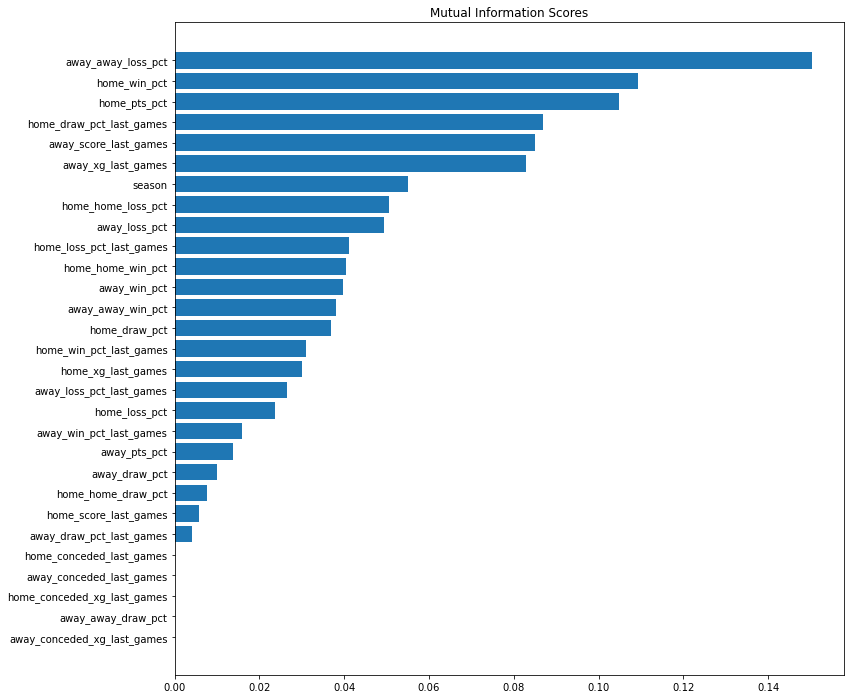

In [26]:
X_train = hf.transform_x(X_train, categorical_cols, numerical_cols)
X_test = hf.transform_x(X_test, categorical_cols, numerical_cols)

display(X_train)
first_mi_scores = hf.make_mi_scores(X_train, y_train)
hf.plot_mi_scores(first_mi_scores)

In [27]:
hf.create_cluster_features(X_train, X_test, first_mi_scores)

Total features to consider when clustering: 29


,season,home_pts_pct,home_win_pct,home_draw_pct,home_loss_pct,home_home_win_pct,home_home_draw_pct,home_home_loss_pct,home_win_pct_last_games,home_draw_pct_last_games,...,Cluster_20,Cluster_21,Cluster_22,Cluster_23,Cluster_24,Cluster_25,Cluster_26,Cluster_27,Cluster_28,Cluster_29
0,2017.0,36.666667,30.000000,20.000000,50.000000,40.000000,20.000000,40.000000,40.0,0.0,...,0,0,3,1,1,0,3,3,4,4
1,2017.0,43.333333,30.000000,40.000000,30.000000,33.333333,33.333333,33.333333,20.0,40.0,...,0,1,2,1,0,2,2,2,3,0
2,2017.0,26.666667,20.000000,20.000000,60.000000,20.000000,0.000000,80.000000,20.0,0.0,...,0,0,3,1,0,2,1,0,0,0
3,2017.0,40.000000,30.000000,30.000000,40.000000,40.000000,40.000000,20.000000,20.0,20.0,...,4,1,2,1,1,3,1,3,2,3
4,2017.0,46.666667,40.000000,20.000000,40.000000,60.000000,20.000000,20.000000,20.0,40.0,...,2,2,3,3,3,4,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,2017.0,33.333333,24.324324,27.027027,48.648649,33.333333,27.777778,38.888889,20.0,60.0,...,3,2,2,0,2,4,1,0,3,0
274,2017.0,36.936937,29.729730,21.621622,48.648649,38.888889,22.222222,38.888889,20.0,0.0,...,3,2,3,3,3,2,1,1,3,2
275,2017.0,70.270270,64.864865,16.216216,18.918919,77.777778,11.111111,11.111111,40.0,20.0,...,2,4,3,3,3,4,0,1,3,4
276,2017.0,32.432432,18.918919,40.540541,40.540541,22.222222,38.888889,38.888889,40.0,40.0,...,1,2,1,2,3,4,0,1,4,2


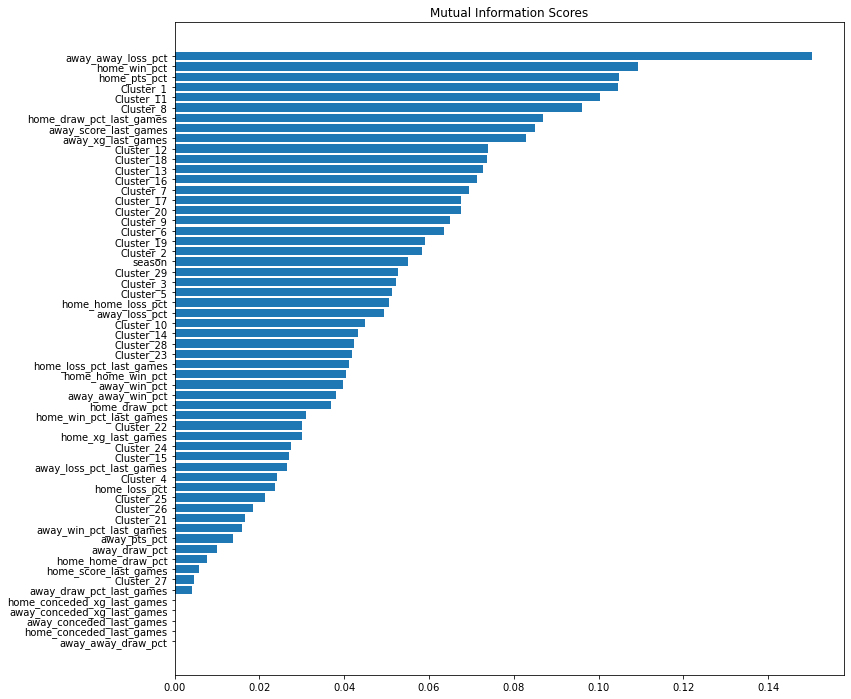

In [28]:
display(X_train)
second_mi_scores = hf.make_mi_scores(X_train, y_train)
hf.plot_mi_scores(second_mi_scores)

In [29]:
X_train, X_test = hf.apply_pca_datasets(X_train, X_test, second_mi_scores)

Total features to consider when doing the PCA: 53


In [30]:
if run_random_search: hf.run_random_forest_random_search(X_train, y_train)
    
# Best models found by the RandomSearch algorithm
# GradientBoostingClassifier(learning_rate=0.05, n_estimators=200, random_state=0)
# RandomForestClassifier(criterion='entropy', max_depth=50, max_features='log2',
#                        min_samples_leaf=2, min_samples_split=10,
#                        n_estimators=2000, random_state=0)

,season,home_pts_pct,home_win_pct,home_draw_pct,home_loss_pct,home_home_win_pct,home_home_draw_pct,home_home_loss_pct,home_win_pct_last_games,home_draw_pct_last_games,...,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53
0,2017.0,36.666667,30.000000,20.000000,50.000000,40.000000,20.000000,40.000000,40.0,0.0,...,-0.003753,0.089209,3.888679e-15,-2.995269e-16,1.884394e-17,-1.171300e-17,1.494873e-16,-8.043259e-18,8.605279e-17,2.881586e-17
1,2017.0,43.333333,30.000000,40.000000,30.000000,33.333333,33.333333,33.333333,20.0,40.0,...,0.011169,-0.054080,4.775886e-16,2.872239e-16,-1.199705e-16,3.494635e-16,4.167854e-16,4.415490e-16,-5.207505e-17,-5.384109e-17
2,2017.0,26.666667,20.000000,20.000000,60.000000,20.000000,0.000000,80.000000,20.0,0.0,...,-0.052083,-0.100016,4.581789e-16,-5.136584e-17,1.376531e-16,-1.600494e-16,-1.162638e-16,-1.858975e-16,5.557479e-17,-7.536697e-17
3,2017.0,40.000000,30.000000,30.000000,40.000000,40.000000,40.000000,20.000000,20.0,20.0,...,0.016476,-0.071736,-3.272157e-16,-1.567156e-16,-5.096092e-17,-4.770934e-17,-2.888563e-17,4.191914e-17,1.440907e-16,-1.747558e-16
4,2017.0,46.666667,40.000000,20.000000,40.000000,60.000000,20.000000,20.000000,20.0,40.0,...,0.040993,0.004230,-5.652452e-16,1.889030e-17,1.470335e-17,1.092429e-16,1.362087e-17,-5.431021e-18,2.344329e-17,-2.182246e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,2017.0,33.333333,24.324324,27.027027,48.648649,33.333333,27.777778,38.888889,20.0,60.0,...,0.007003,0.006038,3.050185e-17,2.589664e-17,9.947812e-18,-1.193363e-17,6.991534e-17,-6.900478e-18,1.060736e-17,2.283663e-17
274,2017.0,36.936937,29.729730,21.621622,48.648649,38.888889,22.222222,38.888889,20.0,0.0,...,0.055134,0.010973,1.123627e-16,-5.479169e-17,-9.551826e-17,2.103507e-17,9.880730e-18,1.647075e-17,1.536312e-16,2.896936e-17
275,2017.0,70.270270,64.864865,16.216216,18.918919,77.777778,11.111111,11.111111,40.0,20.0,...,0.031364,0.014216,-1.063744e-16,-1.425877e-16,1.616481e-17,-5.655354e-17,3.575107e-17,7.188484e-17,-2.646080e-17,-1.382897e-17
276,2017.0,32.432432,18.918919,40.540541,40.540541,22.222222,38.888889,38.888889,40.0,40.0,...,0.010187,0.025912,-4.309479e-16,-6.943539e-17,5.632837e-18,-6.705867e-17,1.636579e-17,4.689693e-18,2.702214e-17,-7.866491e-17


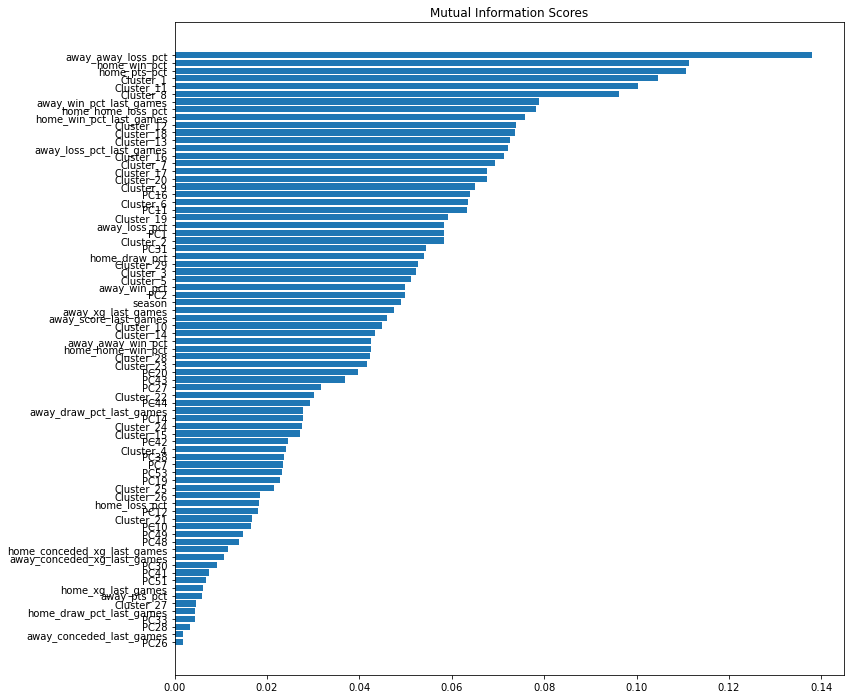

In [31]:
display(X_train)
min_mi_score=0.001
third_mi_scores = hf.make_mi_scores(X_train, y_train)
hf.plot_mi_scores(third_mi_scores[third_mi_scores > min_mi_score])

Results for model logistic_regression:
Classification Report:
              precision    recall  f1-score   support

           A       0.60      0.38      0.47        91
           D       0.19      0.30      0.23        50
           H       0.57      0.58      0.57       137

    accuracy                           0.46       278
   macro avg       0.45      0.42      0.42       278
weighted avg       0.51      0.46      0.48       278

Confusion Matrix:
[[79 42 16]
 [28 15  7]
 [32 24 35]]


Times when H was predicted: 139 (0.5)
Times when D was predicted: 81 (0.29)
Times when A was predicted: 58 (0.21)

Model profit: -12611.556187703554
Maximum negative sequence:  7
Maximum positive sequence:  5


,outcome,pred,away_probs,draw_probs,home_probs,home_odds,away_odds,draw_odds,profit,progress
278,A,H,0.221723,0.156817,0.621459,3.95,1.96,3.71,-525.626178,2000.000000
279,A,D,0.190535,0.655795,0.153670,3.39,2.27,3.35,-553.047570,921.326252
280,H,D,0.276996,0.432739,0.290265,1.58,6.74,3.94,-288.763893,632.562360
281,H,D,0.098540,0.493915,0.407545,1.60,6.24,4.00,-367.393571,265.168788
282,D,H,0.346555,0.083734,0.569711,3.90,1.92,3.89,-459.380376,-194.211588
...,...,...,...,...,...,...,...,...,...,...
551,D,H,0.135378,0.190338,0.674283,1.90,4.16,3.72,-502.853667,-10269.989620
552,H,H,0.121691,0.150118,0.728190,1.31,9.97,5.81,161.417682,-10108.571938
553,A,H,0.067077,0.348360,0.584563,1.31,9.62,6.00,-267.436094,-10376.008032
554,A,H,0.323862,0.335453,0.340685,2.43,2.92,3.53,-69.362449,-10445.370481


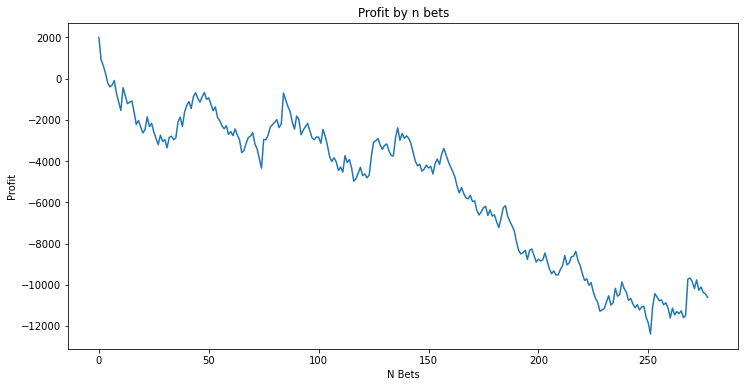

Results for model naive_bayes:
Classification Report:
              precision    recall  f1-score   support

           A       0.60      0.34      0.43        91
           D       0.17      0.42      0.24        50
           H       0.65      0.48      0.55       137

    accuracy                           0.42       278
   macro avg       0.47      0.41      0.41       278
weighted avg       0.55      0.42      0.46       278

Confusion Matrix:
[[66 58 13]
 [21 21  8]
 [14 46 31]]


Times when H was predicted: 101 (0.36)
Times when D was predicted: 125 (0.45)
Times when A was predicted: 52 (0.19)

Model profit: -42683.64797927716
Maximum negative sequence:  8
Maximum positive sequence:  5


,outcome,pred,away_probs,draw_probs,home_probs,home_odds,away_odds,draw_odds,profit,progress
278,A,H,2.303183e-06,9.372338e-05,0.999904,3.95,1.96,3.71,-999.879663,2000.000000
279,A,D,5.219979e-04,9.903691e-01,0.009109,3.39,2.27,3.35,-987.494226,12.626112
280,H,H,6.432988e-05,7.998140e-02,0.919954,1.58,6.74,3.94,504.189601,516.815713
281,H,D,1.388169e-05,9.961465e-01,0.003840,1.60,6.24,4.00,-995.183097,-478.367384
282,D,A,8.449408e-01,2.439337e-04,0.154815,3.90,1.92,3.89,-764.180824,-1242.548208
...,...,...,...,...,...,...,...,...,...,...
551,D,H,1.881763e-03,6.093569e-03,0.992025,1.90,4.16,3.72,-987.827124,-38986.561278
552,H,H,5.185544e-11,6.273265e-09,1.000000,1.31,9.97,5.81,309.999997,-38676.561281
553,A,H,1.483718e-05,3.133325e-01,0.686653,1.31,9.62,6.00,-447.456307,-39124.017588
554,A,D,3.230211e-05,9.105831e-01,0.089385,2.43,2.92,3.53,-885.252536,-40009.270124


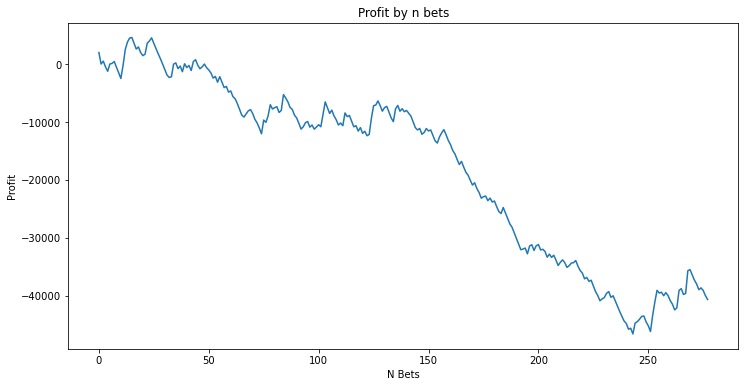

Results for model decision_tree:
Classification Report:
              precision    recall  f1-score   support

           A       0.48      0.36      0.41        91
           D       0.17      0.34      0.23        50
           H       0.52      0.42      0.46       137

    accuracy                           0.38       278
   macro avg       0.39      0.37      0.37       278
weighted avg       0.44      0.38      0.40       278

Confusion Matrix:
[[57 58 22]
 [19 17 14]
 [34 24 33]]


Times when H was predicted: 110 (0.4)
Times when D was predicted: 99 (0.36)
Times when A was predicted: 69 (0.25)

Model profit: -16854.456892778977
Maximum negative sequence:  8
Maximum positive sequence:  4


,outcome,pred,away_probs,draw_probs,home_probs,home_odds,away_odds,draw_odds,profit,progress
278,A,H,0.000000,0.000000,1.000000,3.95,1.96,3.71,-1000.000000,2000.000000
279,A,H,0.244898,0.306122,0.448980,3.39,2.27,3.35,-286.436699,713.563301
280,H,D,0.400000,0.450000,0.150000,1.58,6.74,3.94,-310.406091,403.157210
281,H,D,0.400000,0.450000,0.150000,1.60,6.24,4.00,-312.500000,90.657210
282,D,A,0.833333,0.000000,0.166667,3.90,1.92,3.89,-746.527778,-655.870568
...,...,...,...,...,...,...,...,...,...,...
551,D,H,0.000000,0.000000,1.000000,1.90,4.16,3.72,-1000.000000,-13297.140496
552,H,H,0.000000,0.000000,1.000000,1.31,9.97,5.81,310.000000,-12987.140496
553,A,H,0.000000,0.000000,1.000000,1.31,9.62,6.00,-1000.000000,-13987.140496
554,A,D,0.055556,0.555556,0.388889,2.43,2.92,3.53,-429.650614,-14416.791110


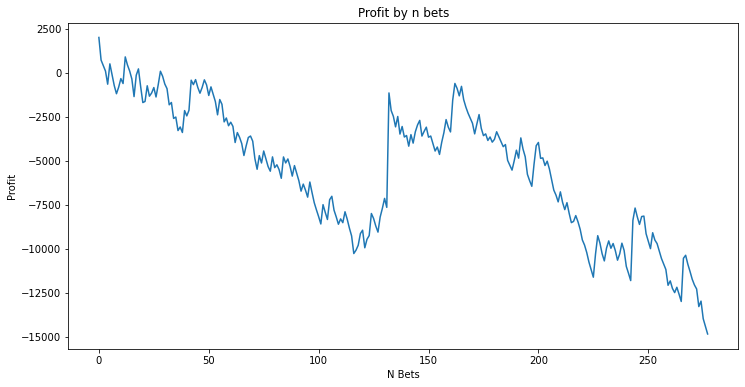

Results for model random_forest:
Classification Report:
              precision    recall  f1-score   support

           A       0.61      0.36      0.46        91
           D       0.11      0.02      0.03        50
           H       0.55      0.87      0.68       137

    accuracy                           0.55       278
   macro avg       0.43      0.42      0.39       278
weighted avg       0.49      0.55      0.49       278

Confusion Matrix:
[[119   3  15]
 [ 43   1   6]
 [ 53   5  33]]


Times when H was predicted: 215 (0.77)
Times when D was predicted: 9 (0.03)
Times when A was predicted: 54 (0.19)

Model profit: -1011.3725558761496
Maximum negative sequence:  6
Maximum positive sequence:  9


,outcome,pred,away_probs,draw_probs,home_probs,home_odds,away_odds,draw_odds,profit,progress
278,A,H,0.170275,0.195309,0.634416,3.95,1.96,3.71,-541.863126,2000.000000
279,A,H,0.262335,0.357666,0.379998,3.39,2.27,3.35,-197.106904,1261.029970
280,H,H,0.199703,0.277123,0.523174,1.58,6.74,3.94,128.403363,1389.433332
281,H,H,0.190884,0.377971,0.431145,1.60,6.24,4.00,45.366523,1434.799856
282,D,H,0.343093,0.186606,0.470301,3.90,1.92,3.89,-334.480773,1100.319082
...,...,...,...,...,...,...,...,...,...,...
551,D,H,0.232555,0.227128,0.540317,1.90,4.16,3.72,-298.378183,1598.373916
552,H,H,0.179890,0.183482,0.636628,1.31,9.97,5.81,111.365702,1709.739618
553,A,H,0.158975,0.254015,0.587010,1.31,9.62,6.00,-271.750410,1437.989208
554,A,H,0.205945,0.334968,0.459086,2.43,2.92,3.53,-236.487958,1201.501249


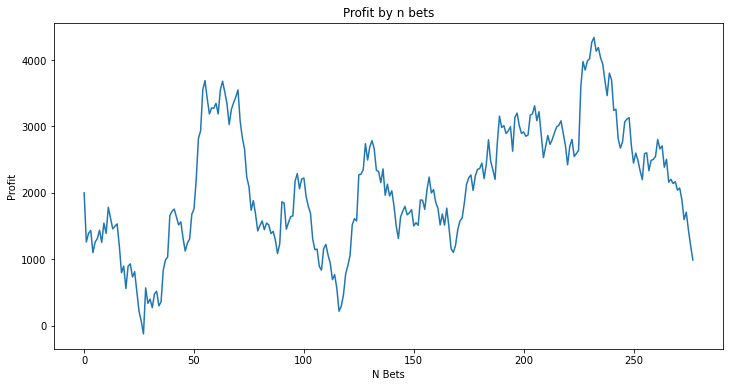

Results for model svm:
Classification Report:
              precision    recall  f1-score   support

           A       0.88      0.16      0.28        91
           D       0.00      0.00      0.00        50
           H       0.52      0.99      0.68       137

    accuracy                           0.54       278
   macro avg       0.47      0.38      0.32       278
weighted avg       0.54      0.54      0.43       278

Confusion Matrix:
[[135   0   2]
 [ 50   0   0]
 [ 76   0  15]]


Times when H was predicted: 261 (0.94)
Times when D was predicted: 0 (0.0)
Times when A was predicted: 17 (0.06)

Model profit: 5313.475391613463
Maximum negative sequence:  9
Maximum positive sequence:  8


,outcome,pred,away_probs,draw_probs,home_probs,home_odds,away_odds,draw_odds,profit,progress
278,A,H,0.270804,0.272549,0.456646,3.95,1.96,3.71,-319.088204,2000.000000
279,A,H,0.323119,0.275498,0.401383,3.39,2.27,3.35,-224.799493,1456.112304
280,H,H,0.265863,0.273011,0.461126,1.58,6.74,3.94,69.638507,1525.750810
281,H,H,0.248089,0.274409,0.477502,1.60,6.24,4.00,90.564399,1616.315209
282,D,H,0.382556,0.274610,0.342833,3.90,1.92,3.89,-174.329239,1441.985970
...,...,...,...,...,...,...,...,...,...,...
551,D,H,0.271105,0.273593,0.455303,1.90,4.16,3.72,-168.619627,7879.790131
552,H,H,0.231750,0.274502,0.493748,1.31,9.97,5.81,33.262051,7913.052182
553,A,H,0.193028,0.279480,0.527493,1.31,9.62,6.00,-166.799915,7746.252268
554,A,H,0.263506,0.273989,0.462506,2.43,2.92,3.53,-241.314384,7504.937883


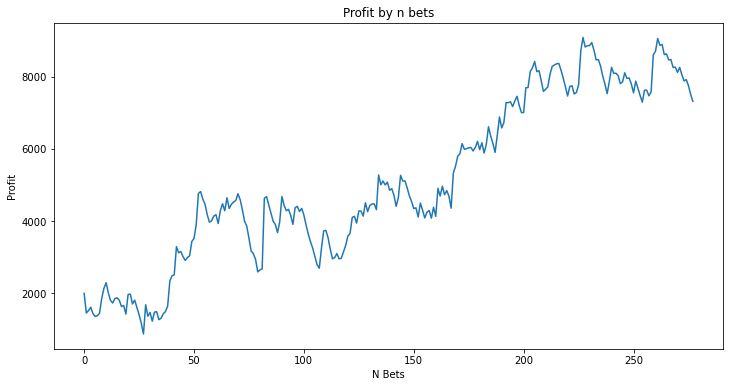

Results for model stochastic_gradient_descent:
Classification Report:
              precision    recall  f1-score   support

           A       0.50      0.04      0.08        91
           D       0.19      0.94      0.32        50
           H       0.88      0.15      0.26       137

    accuracy                           0.26       278
   macro avg       0.52      0.38      0.22       278
weighted avg       0.63      0.26      0.21       278

Confusion Matrix:
[[ 21 114   2]
 [  1  47   2]
 [  2  85   4]]


Times when H was predicted: 24 (0.09)
Times when D was predicted: 246 (0.88)
Times when A was predicted: 8 (0.03)

Model profit: -44806.58148208105
Maximum negative sequence:  16
Maximum positive sequence:  3


,outcome,pred,away_probs,draw_probs,home_probs,home_odds,away_odds,draw_odds,profit,progress
278,A,D,0.0,1.0,0.0,3.95,1.96,3.71,-1000.0,2000.000000
279,A,D,0.0,1.0,0.0,3.39,2.27,3.35,-1000.0,0.000000
280,H,D,0.0,1.0,0.0,1.58,6.74,3.94,-1000.0,-1000.000000
281,H,D,0.0,1.0,0.0,1.60,6.24,4.00,-1000.0,-2000.000000
282,D,A,NaN,NaN,NaN,3.90,1.92,3.89,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
551,D,D,0.0,1.0,0.0,1.90,4.16,3.72,2720.0,-40116.581482
552,H,H,0.0,0.0,1.0,1.31,9.97,5.81,310.0,-39806.581482
553,A,D,0.0,1.0,0.0,1.31,9.62,6.00,-1000.0,-40806.581482
554,A,D,0.0,1.0,0.0,2.43,2.92,3.53,-1000.0,-41806.581482


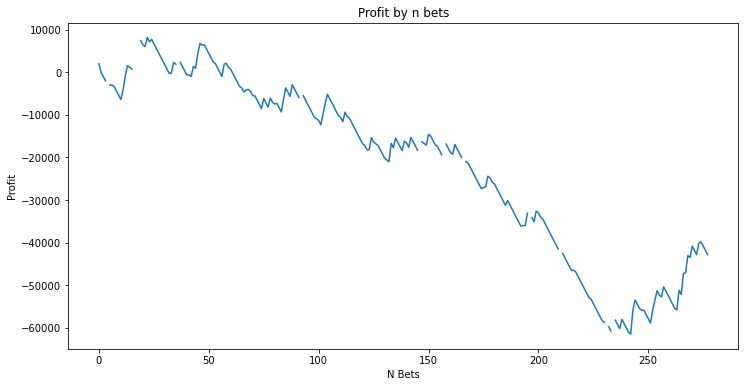

Results for model voting_classifier:
Classification Report:
              precision    recall  f1-score   support

           A       0.53      0.34      0.41        91
           D       0.17      0.48      0.25        50
           H       0.65      0.38      0.48       137

    accuracy                           0.38       278
   macro avg       0.45      0.40      0.38       278
weighted avg       0.52      0.38      0.42       278

Confusion Matrix:
[[52 65 20]
 [18 24  8]
 [10 50 31]]


Times when H was predicted: 80 (0.29)
Times when D was predicted: 139 (0.5)
Times when A was predicted: 59 (0.21)

Model profit: -21102.107390061137
Maximum negative sequence:  12
Maximum positive sequence:  5


,outcome,pred,away_probs,draw_probs,home_probs,home_odds,away_odds,draw_odds,profit,progress
278,A,H,0.110468,0.270795,0.618738,3.95,1.96,3.71,-522.215436,2000.000000
279,A,D,0.170235,0.597575,0.232190,3.39,2.27,3.35,-477.448400,1000.336164
280,H,D,0.190438,0.418809,0.390753,1.58,6.74,3.94,-271.298562,729.037602
281,H,D,0.156254,0.598740,0.245005,1.60,6.24,4.00,-498.425402,230.612200
282,D,A,NaN,NaN,NaN,3.90,1.92,3.89,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
551,D,H,0.106820,0.282859,0.610321,1.90,4.16,3.72,-405.227135,-18208.404627
552,H,H,0.088889,0.101350,0.809761,1.31,9.97,5.81,206.007572,-18002.397055
553,A,H,0.069849,0.365864,0.564286,1.31,9.62,6.00,-231.680658,-18234.077713
554,A,D,0.141483,0.568425,0.290092,2.43,2.92,3.53,-446.165584,-18680.243296


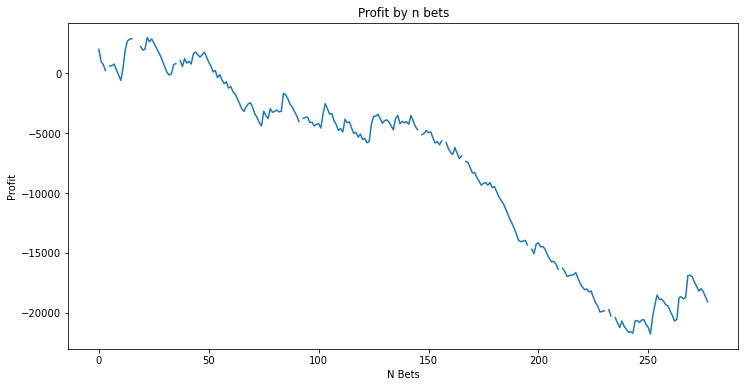

In [39]:
import json
from joblib import load
import pickle

dir_path = f"leagues_v2/{league}/best_models/{season_test}"
models_path = f"{dir_path}/best_models.json"
with open(models_path, 'rb') as file:
    models_dict = json.load(file)
    
models = models_dict.keys()
voting_classifier_estimators = []
for model in models:
    model_path = f"{dir_path}/{model}.joblib"
    try:
        loaded_model = load(model_path)
    except:
        with open(model_path, 'rb') as file:
            loaded_model = pickle.load(file)
    models_dict[model]['estimator'] = loaded_model
    voting_classifier_estimators.append((model, models_dict[model]['estimator']))
    
models_dict['voting_classifier'] = {'estimator': VotingClassifier(estimators=voting_classifier_estimators, voting='soft')}

for model in models_dict.keys():
    print(f"Results for model {model}:")
    my_pipeline = hf.build_pipeline(X_train, y_train, models_dict[model]['estimator'])
    test_results_df = hf.build_pred_df(my_pipeline, X_test, y_test, odds_test)
    display(test_results_df)
    hf.plot_betting_progress(test_results_df)